In [2]:
from nltk.book import *
text1

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<Text: Moby Dick by Herman Melville 1851>

In [11]:
sentence = "The big black Kakatua flew onto a tree branch."
import nltk


In [12]:
sentences = nltk.sent_tokenize(sentence)
sentences = [nltk.word_tokenize(s) for s in sentences]
sentences = [nltk.pos_tag(s) for s in sentences]
sentences


[[('The', 'DT'),
  ('big', 'JJ'),
  ('black', 'JJ'),
  ('Kakatua', 'NNP'),
  ('flew', 'VBD'),
  ('onto', 'IN'),
  ('a', 'DT'),
  ('tree', 'JJ'),
  ('branch', 'NN'),
  ('.', '.')]]

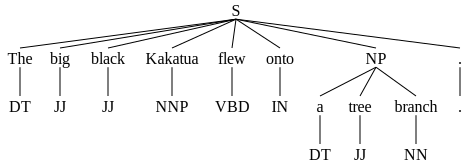

In [13]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
cp.parse(sentences[0])

In [29]:
from transformers import BertTokenizer
import os

sentence = "The big black Kakatua flew onto a tree branch."
tokenizer = BertTokenizer.from_pretrained(os.path.join("pretrained", "bert-base-uncased"))
token_ids = tokenizer.encode(sentence.split(" "), add_special_tokens=False, )
print(token_ids)
print([tokenizer.convert_ids_to_tokens(t) for t in token_ids])


[100, 2502, 2304, 100, 5520, 3031, 1037, 3392, 100]
['[UNK]', 'big', 'black', '[UNK]', 'flew', 'onto', 'a', 'tree', '[UNK]']


In [30]:
sequence = ['ATG', 'TGC', 'GCA', 'CAG', 'AGT', 'GTA', 'TAG', 'AGC', 'GCA', 'CAT', 'ATC', 'TCG', 'CGC', 'GCG', 'CGC', 'GCA', 'CAT', 'ATG', 'TGC', 'GCA', 'CAC', 'ACT', 'CTG', 'TGA', 'GAC', 'ACT', 'CTA', 'TAG', 'AGC']
from transformers import BertTokenizer
import os
gtokenizer = BertTokenizer.from_pretrained(os.path.join("pretrained", "3-new-12w-0"))
gtoken_ids = gtokenizer.encode(sequence, add_special_tokens=False)
print(gtoken_ids)

[12, 35, 61, 40, 18, 57, 24, 19, 61, 38, 11, 32, 51, 64, 51, 61, 38, 12, 35, 61, 39, 14, 44, 33, 55, 14, 41, 24, 19]


In [2]:
from transformers import BertForTokenClassification, BertTokenizer

tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
model = BertForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")
tokenizer.save_pretrained(os.path.join("pretrained", "bert-large-cased-finetuned-conll03-english"))
model.save_pretrained(os.path.join("pretrained", "bert-large-cased-finetuned-conll03-english"))

Downloading: 100%|██████████| 208k/208k [00:01<00:00, 196kB/s]  
Downloading: 100%|██████████| 60.0/60.0 [00:00<00:00, 30.0kB/s]
Downloading: 100%|██████████| 998/998 [00:00<00:00, 499kB/s]
Downloading: 100%|██████████| 1.24G/1.24G [35:48<00:00, 621kB/s]    


('pretrained\\bert-large-cased-finetuned-conll03-english\\tokenizer_config.json',
 'pretrained\\bert-large-cased-finetuned-conll03-english\\special_tokens_map.json',
 'pretrained\\bert-large-cased-finetuned-conll03-english\\vocab.txt',
 'pretrained\\bert-large-cased-finetuned-conll03-english\\added_tokens.json')

In [4]:
def get_special_tokens(tokenizer):
    pad_tok = tokenizer.vocab["[PAD]"]
    sep_tok = tokenizer.vocab["[SEP]"]
    cls_tok = tokenizer.vocab["[CLS]"]

    return pad_tok, sep_tok, cls_tok

get_special_tokens(BertTokenizer.from_pretrained(os.path.join("pretrained", "3-new-12w-0")))

(0, 3, 2)

In [1]:
from nltk import pos_tag
from nltk import RegexpParser
text ="learn php from guru99 and make study easy".split()
print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)
patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)
output = chunker.parse(tokens_tag)
print("After Chunking",output)

After Split: ['learn', 'php', 'from', 'guru99', 'and', 'make', 'study', 'easy']
After Token: [('learn', 'JJ'), ('php', 'NN'), ('from', 'IN'), ('guru99', 'NN'), ('and', 'CC'), ('make', 'VB'), ('study', 'NN'), ('easy', 'JJ')]
After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>*<VBD.?>*<JJ.?>*<CC>?'>
After Chunking (S
  (mychunk learn/JJ)
  (mychunk php/NN)
  from/IN
  (mychunk guru99/NN and/CC)
  make/VB
  (mychunk study/NN easy/JJ))


In [17]:
from data_preparation import str_kmer, kmer
genetic_sequence = "ATGCAGTAGCATCGCGCATGCACTGACTAGC"
kmer = kmer(genetic_sequence, 3)
kmer

['ATG',
 'TGC',
 'GCA',
 'CAG',
 'AGT',
 'GTA',
 'TAG',
 'AGC',
 'GCA',
 'CAT',
 'ATC',
 'TCG',
 'CGC',
 'GCG',
 'CGC',
 'GCA',
 'CAT',
 'ATG',
 'TGC',
 'GCA',
 'CAC',
 'ACT',
 'CTG',
 'TGA',
 'GAC',
 'ACT',
 'CTA',
 'TAG',
 'AGC']